## MealPal Analysis
Author : Kshitiz Sharma<br>
Start Time : 5:30 pm<br>
End Time :  6:15 pm<br>

Task completed in 45 minutes

Hi, This notebook is written by Kshitiz Sharma for the interview at MealPal. This is a property of MealPal and any employee of MealPal can use it, edit it or forward it as required. 

The analysis is done in Python and SQL as asked in the interview. 

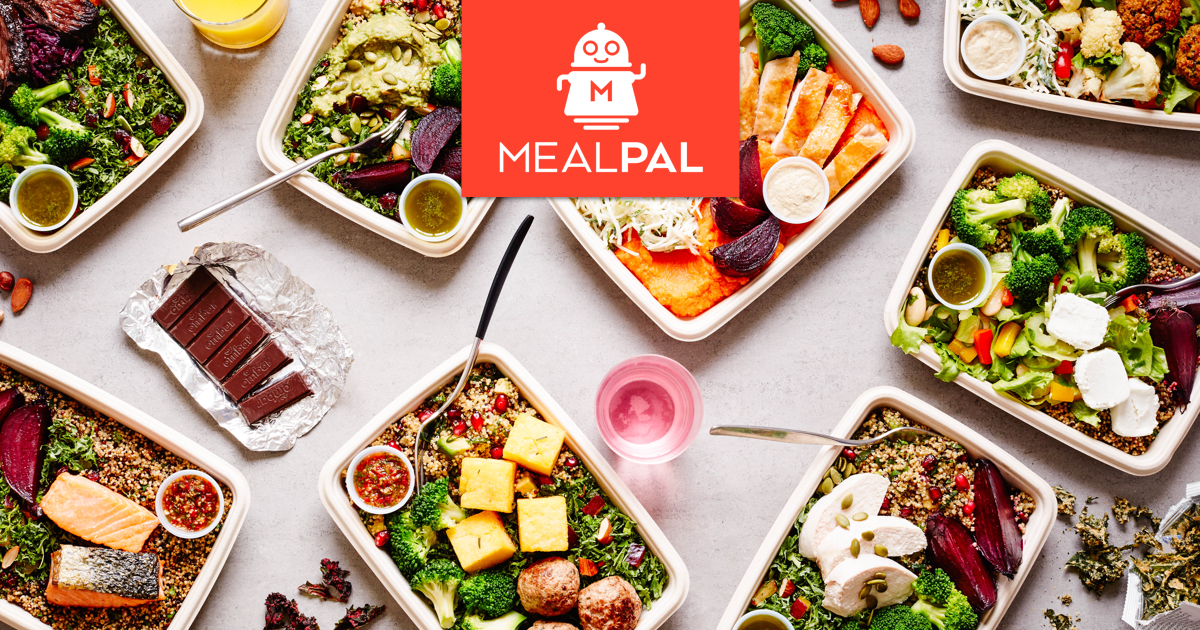

In [3]:
from IPython.display import Image
Image("MealPal.png")

In [4]:
# Declaring Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## SQL Question

#### 1) The number of users that currently have an active subscription cycle in each city <br>
<br>
SELECT <br>
    &emsp;Cities.NAME AS City_Names,<br>
    &emsp;COUNT(distinct Cycles.USER_ID) AS #_Users,<br>
FROM<br>
    &emsp;Cycles<br>
    &emsp;INNER JOIN Plans ON Cycles.PLAN_ID = Plans.ID<br>
    &emsp;INNER JOIN Cities ON  Cities.ID = Plans.CITY_ID <br>
GROUP BY<br>
   &emsp;cities.NAME;<br>
    
    
#### 2) The user_ids of users who got a discount of more than 50%  
<i>Lets assume we have a table called "Full_Price_table" which has 2 columns</i>
1) ID
2) FULL_PRICE

SELECT<br>
    &emsp;distinct Cycles.USER_ID<br>
FROM <br>
    &emsp;Cycles<br>
    &emsp;INNER JOIN Plans on Plans.ID = Cycles.PLAN_ID<br>
    &emsp;INNER JOIN Full_Price_table on Full_Price_table.ID = PLANS.FULL_PRICE_PLAN_ID<br>
WHERE <br>
    &emsp;Plans.PRICE_PER_MEAL < (0.5 * Full_Price_table.FULL_PRICE)<br>



#### 3) The average order value of cycles that began in the month of April 2019

SELECT <br>
&emsp;Cycles.ID as Cycle_ID, AVG(Plans.PRICE_PER_MEAL) as AVG_MEAL_Price<br>
FROM Cycles <br>
&emsp;INNER JOIN Plans on Cycles.Plan_ID=Plans.ID<br>
&emsp;WHERE MONTH(START_DATE) = 5 AND YEAR(START_DATE) = 2019<br>
GROUP BY<br>
&emsp;Cycles.id

## Excel question/ Analysis Questions

I have used Python for analysis though I could have used EXCEL with same speed and accuracy. I will be glad to provide a solutions in EXCEL too. Please let me know 

Thanks !


Loading the dataset and looking into it's description

In [42]:
x1 = pd.ExcelFile("Mealpal Data.xlsx")
res=x1.parse("reservations")
sch=x1.parse("schedules")

# Commented to save space
if(1==0):
    print(res.head(5))
    print(sch.head(5))


    print("\nData columns")
    print(list(res))
    print(list(sch))


    print("\n**************")

    print("\nData Information")
    print(res.info())
    print(sch.info())


### 1) What is the user_id of the user with the most orders?

In [35]:
import operator
users_list=res.groupby('user_id')
orders_no_per_user={}
for key,values in users_list:
    temp=users_list.get_group(key)
    orders_no_per_user[key]=temp.shape[0]

sorted_x = sorted(orders_no_per_user.items(), key=operator.itemgetter(1),reverse=True )
print("List of top 5 users with max orders")
print(sorted_x[0:5])


List of top 5 users with max orders
[('d1a3b7d00a4c', 7), ('8dceb44718a0', 5), ('a9e2e8f3b60b', 5), ('00b31ffdd928', 4), ('02cdb7ea2c5c', 4)]


<b>Answer: User ID with most orders = 'd1a3b7d00a4c'</b>

### 2) How many orders were placed in each city?


Doing an inner join between reservations and schedules on schedule id and than group by on cities and count + chart it out

{'Chicago': 907, 'Seattle': 1334}


<BarContainer object of 2 artists>

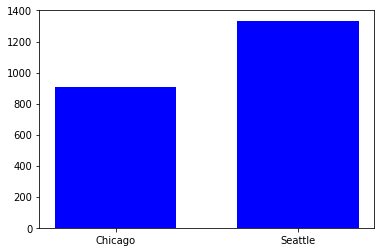

In [91]:
res_sch=pd.merge(res, sch, left_on='schedule_id', right_on='sch_id')

orders_per_city=res_sch.groupby('city')
orders_no_per_city={}
for key,values in orders_per_city:
    temp=orders_per_city.get_group(key)
    orders_no_per_city[key]=temp.shape[0]

print(orders_no_per_city)
x=list(orders_no_per_city.keys())
y=list(orders_no_per_city.values())
plt.bar(x,y,width=1/1.5,color='blue')

<b>Answer: Chicago had 907 orders, Seattle had 1334 orders</b>

### 3) What was the average post-tax cost per city?


In [92]:
sch['post_tax_rate']=sch['rate']+sch['rate']*sch['tax_rate']/100
print(sch.groupby('city')['post_tax_rate'].mean())


city
Chicago    7.388826
Seattle    6.191749
Name: post_tax_rate, dtype: float64


<b>Answer: Chicago had Average Post-Tax rate of 7.33, Seattle had Average Post-tax rate of 6.19</b>

### 4a) Create a chart showing the pickup rate by day?

Group Data by every day and sum up 

In [93]:
res_sch.index=res_sch['date']
res_sch=res_sch.drop('date',axis=1)
print(res_sch.head(5))

                      id   schedule_id   status       user_id      cycle_id  \
date                                                                          
2019-04-11  95d355234049  169147c3af50  ordered  2a6cff7dd7fa  375726ae0994   
2019-04-11  eaf40798bf37  169147c3af50  ordered  be1c3cacda9d  bbf026a7aadc   
2019-04-11  2e97bf588343  169147c3af50  ordered  f5812ff20820  dc4444d3e59b   
2019-04-11  e6802a9311db  169147c3af50  ordered  2f0ffbbee63e  bb9ea2669e5a   
2019-04-11  ce7da138fa9c  169147c3af50  ordered  1ea693a340a2  39324db0446d   

            successful_pickup        sch_id  amount_remaining  initial_amount  \
date                                                                            
2019-04-11              False  169147c3af50                17              52   
2019-04-11               True  169147c3af50                17              52   
2019-04-11               True  169147c3af50                17              52   
2019-04-11              False  169147c3af

date
2019-04-01    220.0
2019-04-02    232.0
2019-04-03    230.0
2019-04-04    207.0
2019-04-05    177.0
2019-04-06      0.0
2019-04-07      0.0
2019-04-08    214.0
2019-04-09    238.0
2019-04-10    220.0
2019-04-11    208.0
2019-04-12    190.0
Freq: D, Name: successful_pickup, dtype: float64
<class 'pandas.core.series.Series'>


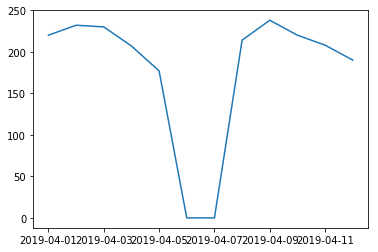

In [104]:
Day_GroupBy=res_sch.groupby(pd.Grouper(freq='D'))['successful_pickup'].sum()
print(Day_GroupBy)

print(type(Day_GroupBy))

plt.plot(Day_GroupBy)

<b>Answer: </b>

### 4b) Please describe any pattern you notice in the pickup rates. Are there any recommendations or further inquiries you would make based on any observable trends? (2-3 sentences)?

<b>Answer: '2019-04-01' is  Monday, on Monday very few people dine out, because of less rush restruants are able to prepare the orders since they don't have much customers. On weekends restruants receive a lot of people and they are not able to prepare the order, since they find more value in serving on-site customers.</b>